## TPOT

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data_train = pd.read_csv('../data/ml/hotel_reservations_train.csv')
data_test = pd.read_csv('../data/ml/hotel_reservations_test.csv')

X_train = data_train.drop('booking_status', axis=1)
y_train = data_train['booking_status']

X_test = data_test.drop('booking_status', axis=1)
y_test = data_test['booking_status']

In [4]:
from tpot import TPOTClassifier

tpot = TPOTClassifier(
    generations=10,                                             # Number of iterations to the run pipeline optimization process
    population_size=100,                                        # Number of individuals to retain in the genetic programming population every generation
    offspring_size=50,                                          # Number of offspring to produce in each genetic programming generation
    mutation_rate=0.9,                                          # Mutation rate for the genetic programming algorithm in the range
    crossover_rate=0.1,                                         # Crossover rate for the genetic programming algorithm in the range
    scoring='accuracy',                                         # Function used to evaluate the quality of a given pipeline for the classification problem
    cv=5,                                                       # Cross-validation strategy used when evaluating pipelines
    subsample=0.8,                                              # Fraction of training samples that are used during the TPOT optimization process
    n_jobs=-1,                                                  # Number of processes to use for evaluating pipelines in parallel during the TPOT optimization process
    max_time_mins=60,                                           # How many minutes TPOT has to optimize the pipeline
    max_eval_time_mins=5,                                       # How many minutes TPOT has to evaluate a single pipeline
    random_state=42,                                            # The seed of the pseudo-random number generator used in TPOT
    config_dict=None,                                           # A configuration dictionary for customizing TPOT’s operators and parameters
    template=None,                                              # A pipeline template to begin the optimization process with
    warm_start=False,                                           # Flag indicating if TPOT should reuse the population from previous calls to fit()
    memory=None,                                                # A caching mechanism to use with TPOT
    use_dask=False,                                             # Flag indicating if TPOT should use Dask for evaluation of the pipelines
    periodic_checkpoint_folder='../.internal/checkpoints',      # Path to a directory where TPOT will save pipelines during the optimization process
    early_stop=None,                                            # How many generations TPOT checks for early stopping. None means no early stopping
    verbosity=2,                                                # How much information TPOT communicates while it’s running
    log_file='../.internal/tpot.log',                           # Log file to write to
    disable_update_check=False                                  # Flag indicating if TPOT should check for updates to the TPOT package
)

/home/drashko/CERAMO/hotel-reservations-analysis/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [7]:
# Fit the TPOT classifier
tpot.fit(X_train, y_train)

/home/drashko/CERAMO/hotel-reservations-analysis/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/drashko/CERAMO/hotel-reservations-analysis/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/drashko/CERAMO/hotel-reservations-analysis/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/drashko/CERAMO/hotel-reservations-


Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.45, min_samples_leaf=1, min_samples_split=14, n_estimators=100)


TPOTClassifier(generations=10, log_file='../.internal/tpot.log',
               max_time_mins=60, n_jobs=-1, offspring_size=50,
               periodic_checkpoint_folder='../.internal/checkpoints',
               random_state=42, scoring='accuracy', subsample=0.8, verbosity=2)

In [8]:
tpot.export('../.internal/tpot_pipeline.py')

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
classification_report = classification_report(y_test, tpot.predict(X_test))
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4273
           1       0.86      0.80      0.83      2124

    accuracy                           0.89      6397
   macro avg       0.89      0.87      0.88      6397
weighted avg       0.89      0.89      0.89      6397



In [15]:
accuracy_score = accuracy_score(y_test, tpot.predict(X_test))
print(accuracy_score)

0.8932312021259966


In [16]:
precision_score = precision_score(y_test, tpot.predict(X_test))
print(precision_score)

0.8648101265822785


In [17]:
recall_score = recall_score(y_test, tpot.predict(X_test))
print(recall_score)

0.8041431261770244


In [18]:
roc_auc_score = roc_auc_score(y_test, tpot.predict(X_test))
print(roc_auc_score)

0.870828876451489


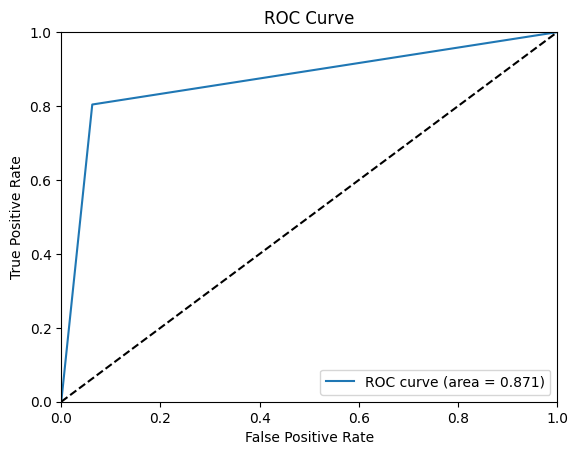

In [19]:
# plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, tpot.predict(X_test))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()